In [1]:
#import modules
import matplotlib.pyplot as plt
from math import *#
import numpy
from scipy.optimize import curve_fit, minimize

#import directly from asc-files
file=open('inac_traces.txt','r')
datas=file.readlines()

k=0
ydata=[]
xdata=[]
#finding the line where the data begins
for i in range(len(datas)):
    s=datas[i]
    if s.find('Index')!=-1:  #by using the "Index" Header
        k=i+1
        break
        
#slicing non-data lines from list
datas=datas[k:]
#slicing a line into x and y data
for i in range(0,len(datas)):
    s=datas[i]
    b=s.find(',')  #by finding the ','
    if b==-1:
        break
    
    s=s[b+2:]
    b=s.index(',')
    xdata.append(float(s[:b]))
    ydata.append(float(s[b+2:len(s)-1]))

#bubblesort for sorting the data, otherwise the plot becomes funny sometimes
for i in range(len(datas)):
    for z in range(0, len(datas)-i-1):
        if xdata[z]>xdata[z+1]:
            xdata[z],xdata[z+1] = xdata[z+1], xdata[z]
            ydata[z],ydata[z+1] = ydata[z+1], ydata[z]

#calculating guess for parameter c (offset in y-direction)
c=ydata[1]
for i in range(len(ydata)):
    if c>ydata[i]:
        c=ydata[i]

#calculating guess for parameter m (offset in x-direction)
o=ydata[1]
for i in range(len(ydata)):
    if o<ydata[i]:
        o=ydata[i]

ab=abs(ydata[1]-abs(o-c)/2)
for i in range(len(xdata)):
    if ab>abs(abs(ydata[i])-abs(o-c)/2):
        ab=abs(abs(ydata[i])-abs(o-c)/2)
        j=i
        
#defining guess parameter for k (stretches the function in x-direction)
g=1E-2

1.1460608038197953e-07
[-6.89568282e-02 -9.20109734e-03 -4.87395860e-09]


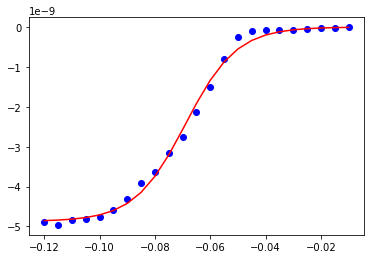

In [4]:
#fit with curvefit
w,d=curve_fit(funcinacc, xdata, ydata, p0=(xdata[j],g, (o-c)))      

#configurations for p0:
#inac- Function: xdata[j],g, (o-c)

#define/clear sequence
datan=[]
#calculate function with parameters
for i in range(len(xdata)):
    datan.append(funcinacc(xdata[i], w[0], w[1], w[2]))
#plot data
plt.plot(xdata, (numpy.array(ydata)), 'bo')
plt.plot(xdata, (numpy.array(datan)), 'r-')
#output parameters and the mean difference between the function and the data
print(funinac(numpy.array(xdata),numpy.array(ydata),c)(w))
print(w)

2.1125944943412502e-09
[-6.91684091e-02  1.00403064e-02  4.99535082e-09]


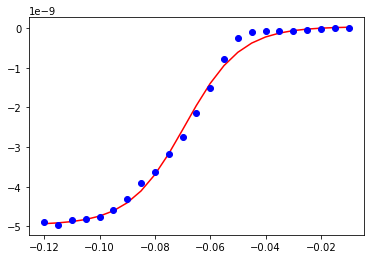

In [5]:
#Initial guess
p0=[xdata[j],g, (o-c)]
#convert sequence to array (otherwise minimize shits its pants)
xar=numpy.array(xdata)
yar=numpy.array(ydata)
#minimize distance function using differnet methods
m=minimize(funinac(xar, yar,c), p0, method='CG')
n=minimize(funinac(xar, yar,c), p0, method='Nelder-Mead')
p=minimize(funinac(xar, yar,c), p0, method='BFGS')

#chossing which mwthod is the best and using it
if (funinac(xar,yar,c)(m.x))>(funinac(xar,yar,c)(n.x)):
    if(funinac(xar,yar,c)(n.x))>(funinac(xar,yar,c)(p.x)):
        m=p;
    else:
        m=n
elif(funinac(xar,yar,c)(n.x))>(funinac(xar,yar,c)(o.x)):
    m=o    
    
#define/clear sequence
wdata=[]
#calculate function
wdata=funcinac(xar, m.x[0], m.x[1], m.x[2],c)
war=numpy.array(wdata)
#plot data
plt.plot((xar), (war), 'r-')
plt.plot((xar), (yar), 'bo')
#output
print(funinac(xar,yar,c)(m.x))
print(m.x)

Funktionenlager:
(Schema: Funktion
         Abstandsfunktion
         Funktion ohne offset)

In [31]:
def func(x, a, b, n=2):  #amöbe-funktion
    return a/(1+(a/n-1)*e**(-b*x))

def fun(x, y):  #amöbe-fkt
    return lambda m: sum(abs(y- (m[0]/(1+(m[0]/m[2]-1)*e**(-m[1]*x))) ))# + 5*e**(-220)*(-m[1])**2*(m[0]/(1+(m[0]/n-1)*e**(-m[1]*x))) )

In [11]:
def funcac(x, m, k, a):   #ac-func
    return a/(1+e**((x-m)/k))

def funac(x,y,c):
    return lambda m: sum(abs(y- (1/(1+e**((x-m[0])/m[1]))-c) ))

In [9]:
def funce(x, a, b, c): #exp-fkt
    return a*e**(-x/b)+c

def fune(x,y):
    return lambda m: sum(abs(y- (m[0]*e**(-x/[1])+m[2]) ))

In [10]:
def funcde(x, a, b, d, f,c,):  #double exp-fct
    return a*e**(-x/b)-d*e**(-x/f)+c

def funde(x, y):  #exp-fkt
    return lambda m: sum(abs(y- ((m[0]*e**(-x/m[1]))-(m[2]*e**(-x/m[3]))+m[4] )))

def funcec(x, a, b, d, f):  
    return a*e**(-x/b)-d*e**(-x/f)

In [3]:
def funcinac(x, m, k, a, c): #inac function
    return a/(1+e**-((x-m)/k))+c

def funinac(x,y,c):
    return lambda m: sum(abs(y- (m[2]/(1+e**-((x-m[0])/m[1]))+c) ))

def funcinacc(x, m, k, a): 
    return (a/(1+e**-((x-m)/k)))

Debug Teststrecke

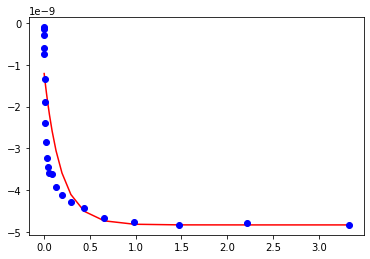

In [22]:
xar=numpy.array(xdata)
yar=numpy.array(ydata)


nyar=test(xar, 0.000000007, 5.5, c, 0.12)

plt.plot(xar, nyar, 'r-')
plt.plot(xar, yar, 'bo')

In [65]:
def test(x, a, b, c, d):
    return a*e**(-b*(x+d))+c

In [135]:
print(c)

-4.827021005


In [3]:
m

NameError: name 'm' is not defined

Debug/Logistik für System und Metadinge

In [2]:
import sys
!conda install --yes --prefix {sys.prefix} scipy
!conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.14
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - scipy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libblas-3.8.0              |      12_openblas          10 KB  conda-forge
    libcblas-3.8.0             |      12_openblas          10 KB  conda-forge
    libgfortran-ng-7.3.0       |       hdf63c60_0         1.3 MB  defaults
    liblapack-3.8.0            |      12_openblas          10 KB  conda-forge
    libopenblas-0.3.7          |       h6e990d7_1         7.6 MB  conda-forge
    numpy-1.17.1               |   py37h95a1406_0         5.2 MB  conda-forge
    scipy-1.3.1                |   py37h921218d_2        18.1 MB  conda-forge
    ----------------

In [ ]:
help('modules')